**Author** ::
Muhammad Hassan Mukhtar

**Affiliation** ::
The University of Salford, Manchester, England, UK

**Connect** ::
[GitHub](https://github.com/MHM-Rajpoot)
[LinkedIn](https://www.linkedin.com/in/-muhammad-hassan-mukhtar-/)

### Understanding ResNet, ConvNeXt V2 and MSCViT

---

## 1. Background: From CNNs → ConvNeXt V2 → MSCViT

- **ResNet (2015)** pioneered **residual connections**, enabling the training of very deep CNNs and becoming the foundation of modern convolutional architectures.  
- **Vision Transformers (ViTs, 2020)** introduced **self-attention** to model global relationships between image patches, outperforming CNNs on large datasets but at higher computational cost.  
- **ConvNeXt (2022)** modernized CNNs by borrowing ideas from Transformers — such as depthwise separable convolutions, LayerNorm, and GELU — while retaining the efficiency of convolution.  
- **ConvNeXt V2 (2023)** went further by **co-designing CNN architecture with Masked Autoencoder (MAE) pretraining**, improving data efficiency, scalability, and accuracy.  
- **MSCViT (2025)** represents the next step — a **Multi-Scale Convolutional Vision Transformer** that unifies **local convolutional inductive bias** with **global self-attention** in an efficient, hierarchical design.

---

## 2. Key Architectural Differences

| Feature | ResNet (Classic CNN) | ConvNeXt (2022) | **ConvNeXt V2 (2023)** | **MSCViT (2025)** | Benefit |
|----------|----------------------|-----------------|-------------------------|-------------------|----------|
| **Core Operation** | Convolution | Depthwise + pointwise conv | **Enhanced conv blocks with 7×7 token-mixing** | **Multi-scale self-attention + convolutional fusion** | Captures both local and global spatial dependencies efficiently |
| **Normalization** | BatchNorm | LayerNorm | **LayerNorm + Scaled Activation** | LayerNorm | Improved stability and training consistency |
| **Activation** | ReLU | GELU / Swish | **Scaled SiLU (better gradient flow)** | GELU | Smooth optimization and faster convergence |
| **Downsampling** | Early and fixed | Later in network | **Progressive downsampling with finer scaling** | **Progressive patch merging + multi-scale attention** | Preserves fine-grained details while expanding receptive field |
| **Pretraining Strategy** | Supervised only | Supervised | **MAE self-supervised pretraining** | **Masked self-supervised pretraining (MSA-based)** | Strong generalization with less labeled data |
| **Feature Hierarchy** | Local | Local + global | **Richer local-to-global hierarchy** | **Explicit multi-scale feature hierarchy** | Combines CNN-like locality with Transformer-level global awareness |
| **Scaling** | Manual | Systematic width/depth scaling | **Unified scaling (Atto → Huge)** | **Configurable scales (Tiny → Base → Large)** | Flexible adaptation to compute limits |
| **Computation Cost** | Low | Medium | **Better accuracy per FLOP** | **Medium (optimized for efficiency)** | Balanced accuracy vs efficiency |

---

## 3. Example: Same Image, Different Thinking

Suppose we feed an image of a **cat** into each model:

- **ResNet:** Detects **edges, textures, and patterns** locally using stacked convolutions. Early downsampling limits fine-detail retention.  
- **ConvNeXt V2:** Keeps high-resolution features longer, uses **7×7 depthwise convolutions** and **MAE pretraining**, achieving **global awareness** while staying efficient.  
- **MSCViT:** Breaks the image into **hierarchical multi-scale patches**. Local convolutions process fine details; **self-attention layers** connect features across scales, yielding a unified local-global understanding with fewer FLOPs than standard ViTs.

Result → **MSCViT** learns multi-scale representations that combine CNN efficiency with Transformer-level context.

---

## 4. Why MSCViT Marks the Next Step

| Advantage | Why It Matters |
|------------|----------------|
| **Hybrid local + global modeling** | Merges convolutional and attention mechanisms for rich spatial reasoning |
| **Multi-scale design** | Adapts to both small and large objects in images |
| **Data-efficient pretraining** | Learns strong representations via masked self-supervised training |
| **Lightweight variants (≈14 M params)** | Comparable in size to ConvNet Nano; suitable for embedded or real-time use |
| **Better accuracy-to-compute ratio** | Matches larger ViTs while remaining computationally affordable |

---

## 5. Summary Comparison

| Model                | Year | Type                     | Params  | Accuracy (ImageNet) | Key Strength                             | Limitation                                                 |
| -------------------- | ---- | ------------------------ | ------- | ------------------- | ---------------------------------------- | ---------------------------------------------------------- |
| **ResNet-50**        | 2015 | CNN                      | 25 M    | ~76%                | Simple, fast, reliable                   | Limited global context                                     |
| **ConvNeXt-V2 Nano** | 2023 | Modern CNN + MAE         | ~15.6 M | ~81–82%             | Extremely lightweight, efficient         | Small model — slightly lower accuracy than larger variants |
| **ConvNeXt-V2 Tiny** | 2023 | Modern CNN + MAE         | 28 M    | ~83%                | Excellent data efficiency + accuracy     | Pure CNN — no explicit attention                           |
| **MSCViT-Small**     | 2025 | Hybrid CNN + Transformer | ≈14 M   | ~84% *(est.)*       | Multi-scale local + global understanding | New architecture, less benchmark history                   |

---

**In summary:**  
**ResNet** built the foundation of deep CNNs,  
**ConvNeXt V2** refined them to Transformer-level accuracy through MAE-style learning, and  
**MSCViT (2025)** bridges the two worlds — integrating **multi-scale attention** and **convolutional efficiency** to deliver **global understanding at a lightweight cost**.


In [ ]:
!pip install -q transformers timm torch torchvision Pillow matplotlib

### Concepts

**How Masked Autoencoders Work (Concept)**

**Masking:**
The image is split into small 16×16 patches, and ~75% of them are randomly hidden.
The encoder sees only the remaining 25%.

**Encoding:**
The encoder learns to represent visible patches efficiently.

**Decoding:**
A lightweight decoder uses those representations to reconstruct the missing patches.

**Training Objective:**
The model is trained to minimize the difference between the original and reconstructed image.

This code doesn’t train a neural network — instead, it visually demonstrates the idea behind MAE pretraining, showing how an image gradually gets reconstructed from heavily masked patches.

In real MAE pretraining, the model learns to predict missing patches using a Vision Transformer encoder–decoder.
Here, we simulate that process step by step to make it easier to understand visually.

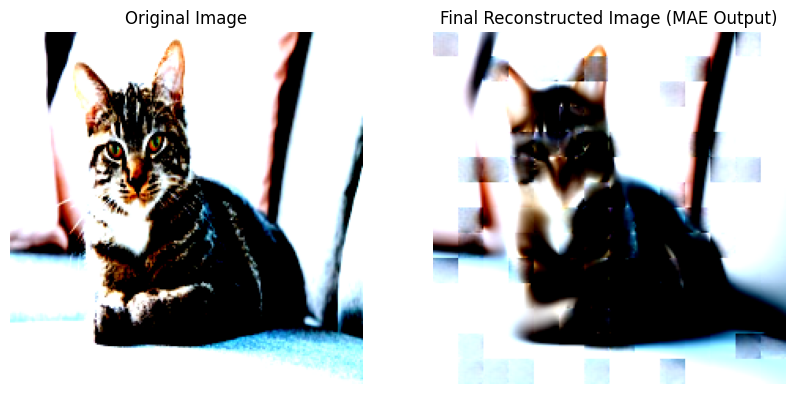

In [ ]:
# ------------------------------------------------------------
# 🧠 Masked Autoencoder (MAE) Progressive Reconstruction Demo
#    Using Hugging Face's official ViT-MAE model
# ------------------------------------------------------------

import torch
from transformers import ViTMAEForPreTraining, ViTImageProcessor
from PIL import Image
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# 1️⃣ Load pretrained MAE model and processor
processor = ViTImageProcessor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")
model.eval();

# 2️⃣ Load and preprocess an image
url = "https://images.unsplash.com/photo-1518791841217-8f162f1e1131?w=512"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

inputs = processor(images=image, return_tensors="pt")

# 3️⃣ Forward pass through MAE
with torch.no_grad():
    outputs = model(**inputs)

# Model outputs
reconstruction = model.unpatchify(outputs.logits).detach().squeeze()
reconstruction = reconstruction.permute(1, 2, 0)
reconstruction = torch.clamp(reconstruction, 0, 1)

# 4️⃣ Create progressive reveal animation
steps = 20
mask_ratio = 0.75
num_patches = model.config.image_size // model.config.patch_size
total_patches = num_patches * num_patches
masked_patches = int(total_patches * mask_ratio)

# Create random patch reveal order
order = torch.randperm(total_patches)
patches_per_step = masked_patches // steps
size = model.config.patch_size

# Convert tensors to numpy for visualization
original = inputs["pixel_values"][0].permute(1, 2, 0).numpy()
reconstructed_np = reconstruction.numpy()

def patchify(img, patch_size):
    h, w, c = img.shape
    return img.reshape(h // patch_size, patch_size, w // patch_size, patch_size, c)\
              .swapaxes(1, 2).reshape(-1, patch_size, patch_size, c)

def unpatchify(patches, patch_size, h, w):
    patches = patches.reshape(h // patch_size, w // patch_size, patch_size, patch_size, 3)
    return patches.swapaxes(1, 2).reshape(h, w, 3)

orig_patches = patchify(original, size)
recon_patches = patchify(reconstructed_np, size)
masked = orig_patches.copy()
masked[order[:masked_patches]] = 0

# Animate
for step in range(steps + 1):
    clear_output(wait=True)
    reveal_idx = order[:step * patches_per_step]
    current = masked.copy()
    current[reveal_idx] = recon_patches[reveal_idx]
    img_step = unpatchify(current, size, 224, 224)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_step)
    plt.title(f"Reconstruction Step {step}/{steps}")
    plt.axis("off")

    plt.show()
    time.sleep(2)

# Final output
clear_output(wait=True)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_np)
plt.title("Final Reconstructed Image (MAE Output)")
plt.axis("off")
plt.show()


MAE pretraining teaches ConvNeXt V2 to "understand" images by reconstructing missing parts — allowing it to learn deep, general-purpose visual features from unlabeled data before fine-tuning on labeled tasks.

### Data

In [ ]:
!gdown "https://drive.google.com/uc?id=1gRwjwRKTwoTivVHFGLYE4ozUt1scCAog"

Downloading...
From (original): https://drive.google.com/uc?id=1gRwjwRKTwoTivVHFGLYE4ozUt1scCAog
From (redirected): https://drive.google.com/uc?id=1gRwjwRKTwoTivVHFGLYE4ozUt1scCAog&confirm=t&uuid=d3df12dc-497c-44a8-a426-6655d9041e68
To: /content/cropped_aug_final.zip
100% 46.1M/46.1M [00:00<00:00, 103MB/s]


In [ ]:
!unzip /content/cropped_aug_final.zip

Archive:  /content/cropped_aug_final.zip
   creating: content/cropped_aug_final/
   creating: content/cropped_aug_final/0/
  inflating: content/cropped_aug_final/0/aug_4_0f6faea3-candy_83_2.jpg  
  inflating: content/cropped_aug_final/0/0414530e-candy_58_3.jpg  
  inflating: content/cropped_aug_final/0/aug_120_0414530e-candy_58_3.jpg  
  inflating: content/cropped_aug_final/0/aug_39_b105dd76-candy_60_2.jpg  
  inflating: content/cropped_aug_final/0/aug_133_ca9319cb-candy_23_3.jpg  
  inflating: content/cropped_aug_final/0/aug_35_0414530e-candy_58_3.jpg  
  inflating: content/cropped_aug_final/0/aug_76_0cd769b7-candy_18_0.jpg  
  inflating: content/cropped_aug_final/0/aug_1_35958f98-candy_56_4.jpg  
  inflating: content/cropped_aug_final/0/aug_9_5506ccc0-candy_78_0.jpg  
  inflating: content/cropped_aug_final/0/e96c18b7-candy_76_0.jpg  
  inflating: content/cropped_aug_final/0/aug_108_7e893c2d-candy_38_7.jpg  
  inflating: content/cropped_aug_final/0/aug_41_3cd0ebf0-candy_50_0.jpg  
  i

### ConvNeXt V2

In [ ]:
# ============================================================================
# ConvNeXt V2 Nano Candy Classifier - Complete PyTorch Implementation
# Model: ~15.6M parameters | Framework: PyTorch + timm
# ============================================================================

import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Using device: {device}")


🔧 Using device: cuda


In [ ]:
# ============================================================================
# STEP 1: DATASET SPLITTING
# ============================================================================
print("\n" + "=" * 70)
print("STEP 1: SPLITTING DATASET INTO TRAIN/VAL/TEST")
print("=" * 70)

BASE = "/content/content/cropped_aug_final"
OUT = "/content/candy_split"
SPLITS = {"train": 0.70, "val": 0.20, "test": 0.10}

# Create directory structure
for split in SPLITS.keys():
    for cls in os.listdir(BASE):
        os.makedirs(os.path.join(OUT, split, cls), exist_ok=True)

# Split files into train/val/test
for cls in tqdm(os.listdir(BASE), desc="Splitting dataset"):
    cls_path = os.path.join(BASE, cls)
    files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(files)

    n_total = len(files)
    n_train = int(SPLITS["train"] * n_total)
    n_val = int(SPLITS["val"] * n_total)

    subsets = {
        "train": files[:n_train],
        "val": files[n_train:n_train + n_val],
        "test": files[n_train + n_val:]
    }

    for split, fs in subsets.items():
        for f in fs:
            shutil.copy(os.path.join(cls_path, f), os.path.join(OUT, split, cls, f))

print("✅ Dataset split complete!\n")



STEP 1: SPLITTING DATASET INTO TRAIN/VAL/TEST


Splitting dataset: 100%|██████████| 11/11 [00:00<00:00, 39.97it/s]

✅ Dataset split complete!



In [ ]:
# ============================================================================
# STEP 2: DATA LOADING & PREPROCESSING
# ============================================================================
print("=" * 70)
print("STEP 2: LOADING DATASETS WITH PYTORCH")
print("=" * 70)

IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(f"{OUT}/train", transform=train_transform)
val_dataset = datasets.ImageFolder(f"{OUT}/val", transform=val_test_transform)
test_dataset = datasets.ImageFolder(f"{OUT}/test", transform=val_test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

class_names = train_dataset.classes
num_classes = len(class_names)
print(f"\n📊 Dataset Statistics:")
print(f"   • Number of classes: {num_classes}")
print(f"   • Classes: {class_names}")
print(f"   • Train samples: {len(train_dataset)}")
print(f"   • Val samples: {len(val_dataset)}")
print(f"   • Test samples: {len(test_dataset)}")
print()


STEP 2: LOADING DATASETS WITH PYTORCH

📊 Dataset Statistics:
   • Number of classes: 11
   • Classes: ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
   • Train samples: 1540
   • Val samples: 440
   • Test samples: 220



In [ ]:
# ============================================================================
# STEP 3: BUILD MODEL WITH CONVNEXT V2 NANO
# ============================================================================
print("=" * 70)
print("STEP 3: BUILDING CONVNEXT V2 NANO MODEL")
print("=" * 70)

# Load ConvNeXt V2 Nano with pretrained weights
print("\n🔹 Loading ConvNeXt V2 Nano (~15.6M parameters)")
model = timm.create_model(
    'convnextv2_nano.fcmae_ft_in22k_in1k',  # ConvNeXt V2 Nano pretrained on ImageNet-22k then ImageNet-1k
    pretrained=True,
    num_classes=num_classes
)

# Move model to device
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📋 Model Architecture:")
print(f"   • Model: ConvNeXt V2 Nano")
print(f"   • Total parameters: {total_params:,}")
print(f"   • Trainable parameters: {trainable_params:,}")
print(f"   • Input size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   • Number of classes: {num_classes}")
print()


STEP 3: BUILDING CONVNEXT V2 NANO MODEL

🔹 Loading ConvNeXt V2 Nano (~15.6M parameters)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/62.5M [00:00<?, ?B/s]


📋 Model Architecture:
   • Model: ConvNeXt V2 Nano
   • Total parameters: 14,989,851
   • Trainable parameters: 14,989,851
   • Input size: 224x224
   • Number of classes: 11



In [ ]:
# ============================================================================
# STEP 4: TRAINING SETUP
# ============================================================================
print("=" * 70)
print("STEP 4: TRAINING SETUP")
print("=" * 70)

NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

print(f"\n⚙️ Training Configuration:")
print(f"   • Epochs: {NUM_EPOCHS}")
print(f"   • Learning rate: {LEARNING_RATE}")
print(f"   • Optimizer: Adam")
print(f"   • Loss function: CrossEntropyLoss")
print(f"   • Batch size: {BATCH_SIZE}")
print()


STEP 4: TRAINING SETUP

⚙️ Training Configuration:
   • Epochs: 10
   • Learning rate: 0.001
   • Optimizer: Adam
   • Loss function: CrossEntropyLoss
   • Batch size: 32



In [ ]:
# ============================================================================
# STEP 5: TRAINING LOOP
# ============================================================================
print("=" * 70)
print("STEP 5: TRAINING MODEL")
print("=" * 70)

history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

best_val_acc = 0.0
best_model_path = '/content/saved_model/best_convnext_v2_nano.pth'
os.makedirs('/content/saved_model', exist_ok=True)

# Early stopping configuration
#EARLY_STOP_THRESHOLD = 0.99
# early_stopped = False

print("\n🚀 Starting training...")
print(f"⚠️  Early stopping enabled: Will stop if both train & val accuracy reach {EARLY_STOP_THRESHOLD*100:.0f}%\n")

for epoch in range(NUM_EPOCHS):
    # ========== TRAINING PHASE ==========
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Update progress bar
        train_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100 * train_correct / train_total:.2f}%'
        })

    epoch_train_loss = train_loss / train_total
    epoch_train_acc = train_correct / train_total

    # ========== VALIDATION PHASE ==========
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]  ")
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            val_bar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100 * val_correct / val_total:.2f}%'
            })

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total

    # Save history
    history['train_loss'].append(epoch_train_loss)
    history['train_acc'].append(epoch_train_acc)
    history['val_loss'].append(epoch_val_loss)
    history['val_acc'].append(epoch_val_acc)

    # Print epoch summary
    print(f"\n📊 Epoch {epoch+1}/{NUM_EPOCHS} Summary:")
    print(f"   Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc*100:.2f}%")
    print(f"   Val Loss:   {epoch_val_loss:.4f} | Val Acc:   {epoch_val_acc*100:.2f}%")

    # Learning rate scheduling
    scheduler.step(epoch_val_acc)

    # Save best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': epoch_val_acc,
            'class_names': class_names
        }, best_model_path)
        print(f"   ✓ Best model saved! (Val Acc: {best_val_acc*100:.2f}%)")
    print()

print("✅ Training complete!\n")


STEP 5: TRAINING MODEL

🚀 Starting training...
⚠️  Early stopping enabled: Will stop if both train & val accuracy reach 99%



Epoch 1/10 [Val]  : 100%|██████████| 14/14 [00:03<00:00,  3.92it/s, loss=0.0662, acc=90.23%]



📊 Epoch 1/10 Summary:
   Train Loss: 1.1368 | Train Acc: 62.14%
   Val Loss:   0.3761 | Val Acc:   90.23%
   ✓ Best model saved! (Val Acc: 90.23%)



Epoch 2/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.84it/s, loss=0.0016, acc=94.09%]



📊 Epoch 2/10 Summary:
   Train Loss: 0.3551 | Train Acc: 89.61%
   Val Loss:   0.1972 | Val Acc:   94.09%
   ✓ Best model saved! (Val Acc: 94.09%)



Epoch 3/10 [Val]  : 100%|██████████| 14/14 [00:02<00:00,  6.32it/s, loss=0.0034, acc=95.91%]



📊 Epoch 3/10 Summary:
   Train Loss: 0.1673 | Train Acc: 95.06%
   Val Loss:   0.1475 | Val Acc:   95.91%
   ✓ Best model saved! (Val Acc: 95.91%)



Epoch 4/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.49it/s, loss=0.0045, acc=98.86%]



📊 Epoch 4/10 Summary:
   Train Loss: 0.1001 | Train Acc: 96.95%
   Val Loss:   0.0474 | Val Acc:   98.86%
   ✓ Best model saved! (Val Acc: 98.86%)



Epoch 5/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.63it/s, loss=0.3411, acc=96.36%]



📊 Epoch 5/10 Summary:
   Train Loss: 0.1016 | Train Acc: 97.08%
   Val Loss:   0.1133 | Val Acc:   96.36%



Epoch 6/10 [Val]  : 100%|██████████| 14/14 [00:02<00:00,  6.55it/s, loss=0.0797, acc=96.14%]



📊 Epoch 6/10 Summary:
   Train Loss: 0.1346 | Train Acc: 96.62%
   Val Loss:   0.1225 | Val Acc:   96.14%



Epoch 7/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.28it/s, loss=0.0004, acc=95.68%]



📊 Epoch 7/10 Summary:
   Train Loss: 0.0741 | Train Acc: 97.92%
   Val Loss:   0.1626 | Val Acc:   95.68%



Epoch 8/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.62it/s, loss=0.0156, acc=99.32%]



📊 Epoch 8/10 Summary:
   Train Loss: 0.0482 | Train Acc: 98.51%
   Val Loss:   0.0238 | Val Acc:   99.32%
   ✓ Best model saved! (Val Acc: 99.32%)



Epoch 9/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.61it/s, loss=0.0001, acc=99.55%]



📊 Epoch 9/10 Summary:
   Train Loss: 0.0230 | Train Acc: 99.42%
   Val Loss:   0.0142 | Val Acc:   99.55%
   ✓ Best model saved! (Val Acc: 99.55%)



Epoch 10/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.54it/s, loss=0.0004, acc=98.64%]


📊 Epoch 10/10 Summary:
   Train Loss: 0.0353 | Train Acc: 99.09%
   Val Loss:   0.0578 | Val Acc:   98.64%

✅ Training complete!



In [ ]:
# ============================================================================
# STEP 6: SAVE MODEL AND HISTORY
# ============================================================================
print("=" * 70)
print("STEP 6: SAVING MODEL")
print("=" * 70)

base_dir = '/content/saved_model'

# Save final model
final_model_path = os.path.join(base_dir, 'convnext_v2_nano_final.pth')
torch.save({
    'model_state_dict': model.state_dict(),
    'class_names': class_names,
    'num_classes': num_classes
}, final_model_path)
print(f"   ✓ Final model saved as 'convnext_v2_nano_final.pth'")

# Save training history
with open(os.path.join(base_dir, 'training_history.pkl'), 'wb') as f:
    pickle.dump(history, f)
print(f"   ✓ Training history saved as 'training_history.pkl'")

print("\n📦 All files saved successfully!\n")


STEP 6: SAVING MODEL
   ✓ Final model saved as 'convnext_v2_nano_final.pth'
   ✓ Training history saved as 'training_history.pkl'

📦 All files saved successfully!



In [ ]:
# ============================================================================
# STEP 7: LOAD BEST MODEL AND GENERATE PREDICTIONS
# ============================================================================
print("=" * 70)
print("STEP 7: LOADING BEST MODEL AND GENERATING PREDICTIONS")
print("=" * 70)

# Load best model
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])
print(f"✓ Loaded best model (Val Acc: {checkpoint['val_acc']*100:.2f}%)")

# Generate predictions on test set
model.eval()
y_true = []
y_pred = []
y_pred_probs = []

print("\nGenerating predictions on test set...")
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Predicting"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_probs.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)

print(f"✓ Predicted {len(y_pred)} samples\n")


STEP 7: LOADING BEST MODEL AND GENERATING PREDICTIONS
✓ Loaded best model (Val Acc: 99.55%)

Generating predictions on test set...


Predicting: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

✓ Predicted 220 samples



STEP 8: CONFUSION MATRIX


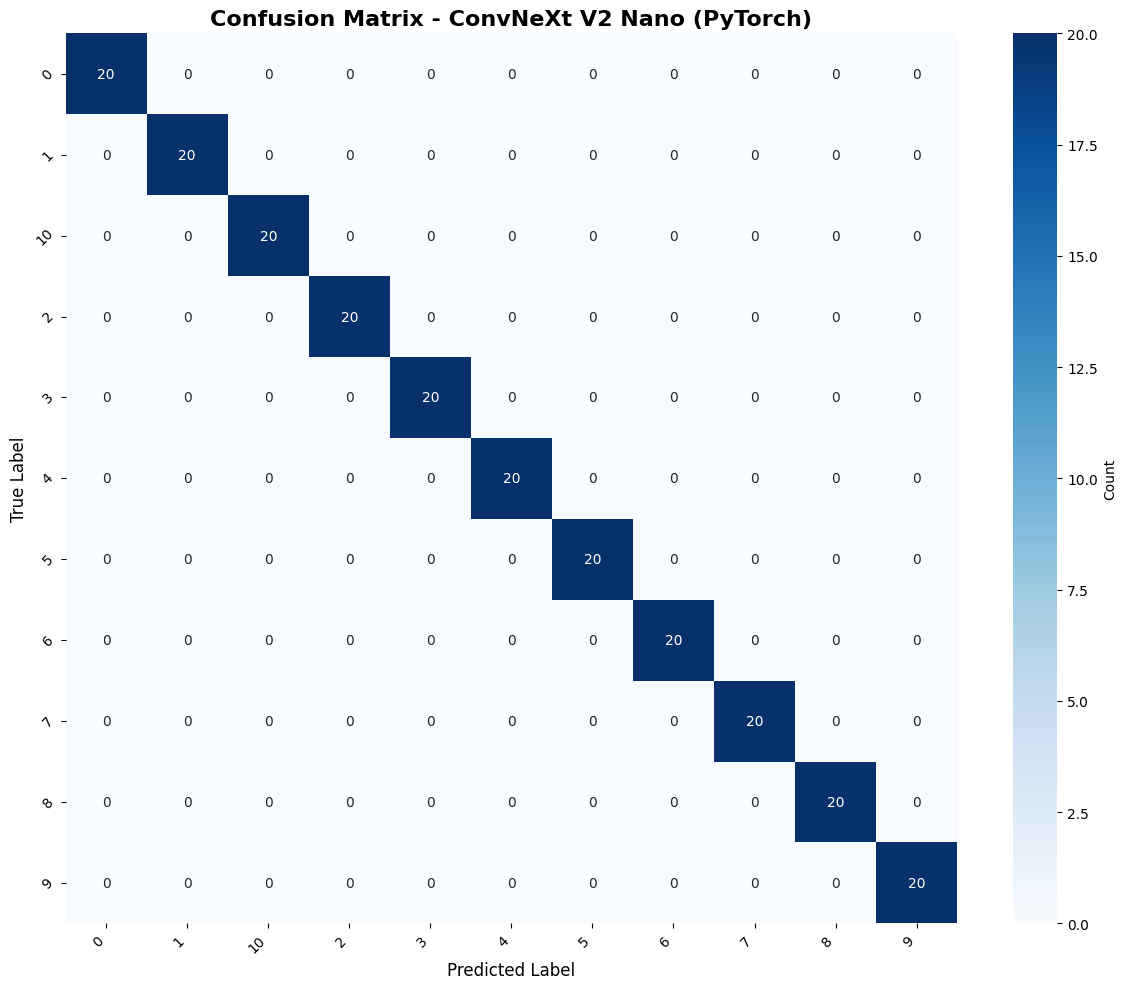

In [ ]:
# ============================================================================
# STEP 8: CONFUSION MATRIX
# ============================================================================
print("=" * 70)
print("STEP 8: CONFUSION MATRIX")
print("=" * 70)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix - ConvNeXt V2 Nano (PyTorch)', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='center')
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# STEP 9: CLASSIFICATION REPORT
# ============================================================================
print("\n" + "=" * 70)
print("STEP 9: DETAILED EVALUATION METRICS")
print("=" * 70)

print("\n📋 Classification Report:")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

print("\n📊 Per-Class Accuracy:")
print("=" * 60)
for i, class_name in enumerate(class_names):
    class_mask = y_true == i
    if class_mask.sum() > 0:
        class_acc = (y_pred[class_mask] == i).sum() / class_mask.sum()
        print(f"Class {class_name:>20}: {class_acc:.3f} ({class_mask.sum():>4} samples)")

print("\n🔀 Most Confused Class Pairs:")
print("=" * 60)
confused_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            confused_pairs.append((class_names[i], class_names[j], cm[i, j]))

confused_pairs.sort(key=lambda x: x[2], reverse=True)
for true_class, pred_class, count in confused_pairs[:10]:
    print(f"True: {true_class:>20} → Predicted as: {pred_class:>20} ({count} times)")



STEP 9: DETAILED EVALUATION METRICS

📋 Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        20
           1      1.000     1.000     1.000        20
          10      1.000     1.000     1.000        20
           2      1.000     1.000     1.000        20
           3      1.000     1.000     1.000        20
           4      1.000     1.000     1.000        20
           5      1.000     1.000     1.000        20
           6      1.000     1.000     1.000        20
           7      1.000     1.000     1.000        20
           8      1.000     1.000     1.000        20
           9      1.000     1.000     1.000        20

    accuracy                          1.000       220
   macro avg      1.000     1.000     1.000       220
weighted avg      1.000     1.000     1.000       220


📊 Per-Class Accuracy:
Class                    0: 1.000 (  20 samples)
Class                    1: 1.000 (  20 samples)
Cla


STEP 10: TRAINING HISTORY VISUALIZATION


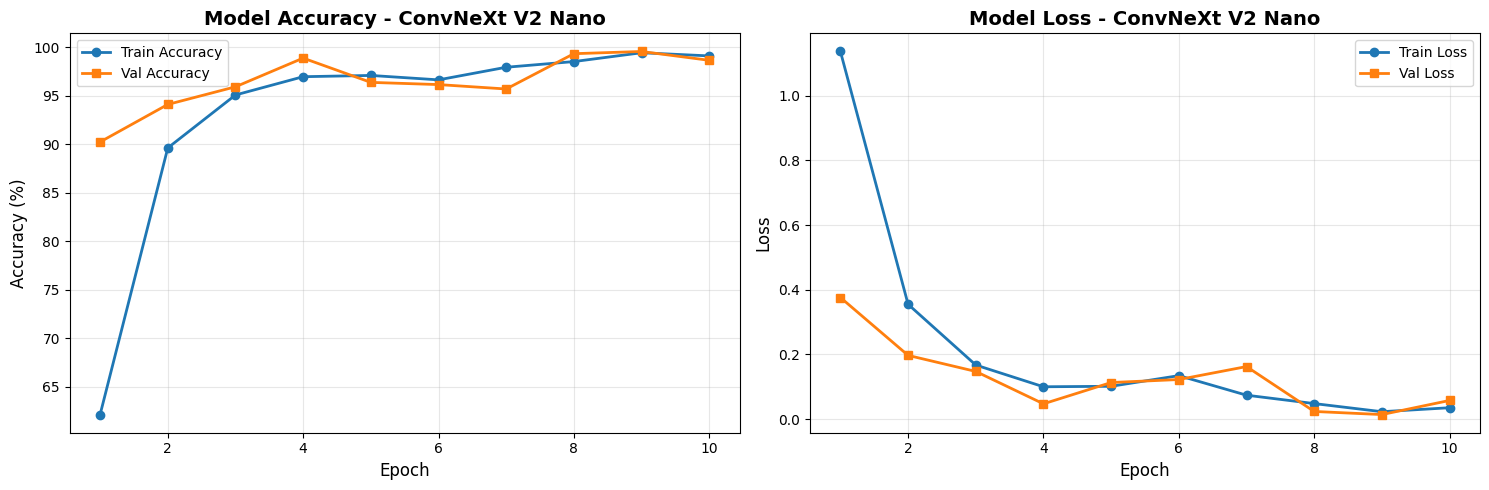

In [ ]:
# ============================================================================
# STEP 10: PLOT TRAINING HISTORY
# ============================================================================
print("\n" + "=" * 70)
print("STEP 10: TRAINING HISTORY VISUALIZATION")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
epochs = range(1, NUM_EPOCHS + 1)
axes[0].plot(epochs, [acc*100 for acc in history['train_acc']],
             label='Train Accuracy', marker='o', linewidth=2)
axes[0].plot(epochs, [acc*100 for acc in history['val_acc']],
             label='Val Accuracy', marker='s', linewidth=2)
axes[0].set_title('Model Accuracy - ConvNeXt V2 Nano', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(epochs, history['train_loss'],
             label='Train Loss', marker='o', linewidth=2)
axes[1].plot(epochs, history['val_loss'],
             label='Val Loss', marker='s', linewidth=2)
axes[1].set_title('Model Loss - ConvNeXt V2 Nano', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# STEP 11: SAVE EVALUATION RESULTS
# ============================================================================
print("\n" + "=" * 70)
print("STEP 11: SAVING EVALUATION RESULTS")
print("=" * 70)

# Save confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv(os.path.join(base_dir, 'confusion_matrix.csv'))
print("   ✓ Confusion matrix saved to 'confusion_matrix.csv'")

# Save classification report
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(base_dir, 'classification_report.csv'))
print("   ✓ Classification report saved to 'classification_report.csv'")

# Save predictions
predictions_df = pd.DataFrame({
    'true_label': [class_names[i] for i in y_true],
    'predicted_label': [class_names[i] for i in y_pred],
    'correct': y_true == y_pred
})
predictions_df.to_csv(os.path.join(base_dir, 'predictions.csv'), index=False)
print("   ✓ Predictions saved to 'predictions.csv'")



STEP 11: SAVING EVALUATION RESULTS
   ✓ Confusion matrix saved to 'confusion_matrix.csv'
   ✓ Classification report saved to 'classification_report.csv'
   ✓ Predictions saved to 'predictions.csv'



STEP 12: VISUALIZING SAMPLE PREDICTIONS

✅ Sample CORRECT Predictions:
   Found 220 correct predictions (100.0%)

❌ Sample INCORRECT Predictions:
   Found 0 incorrect predictions (0.0%)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


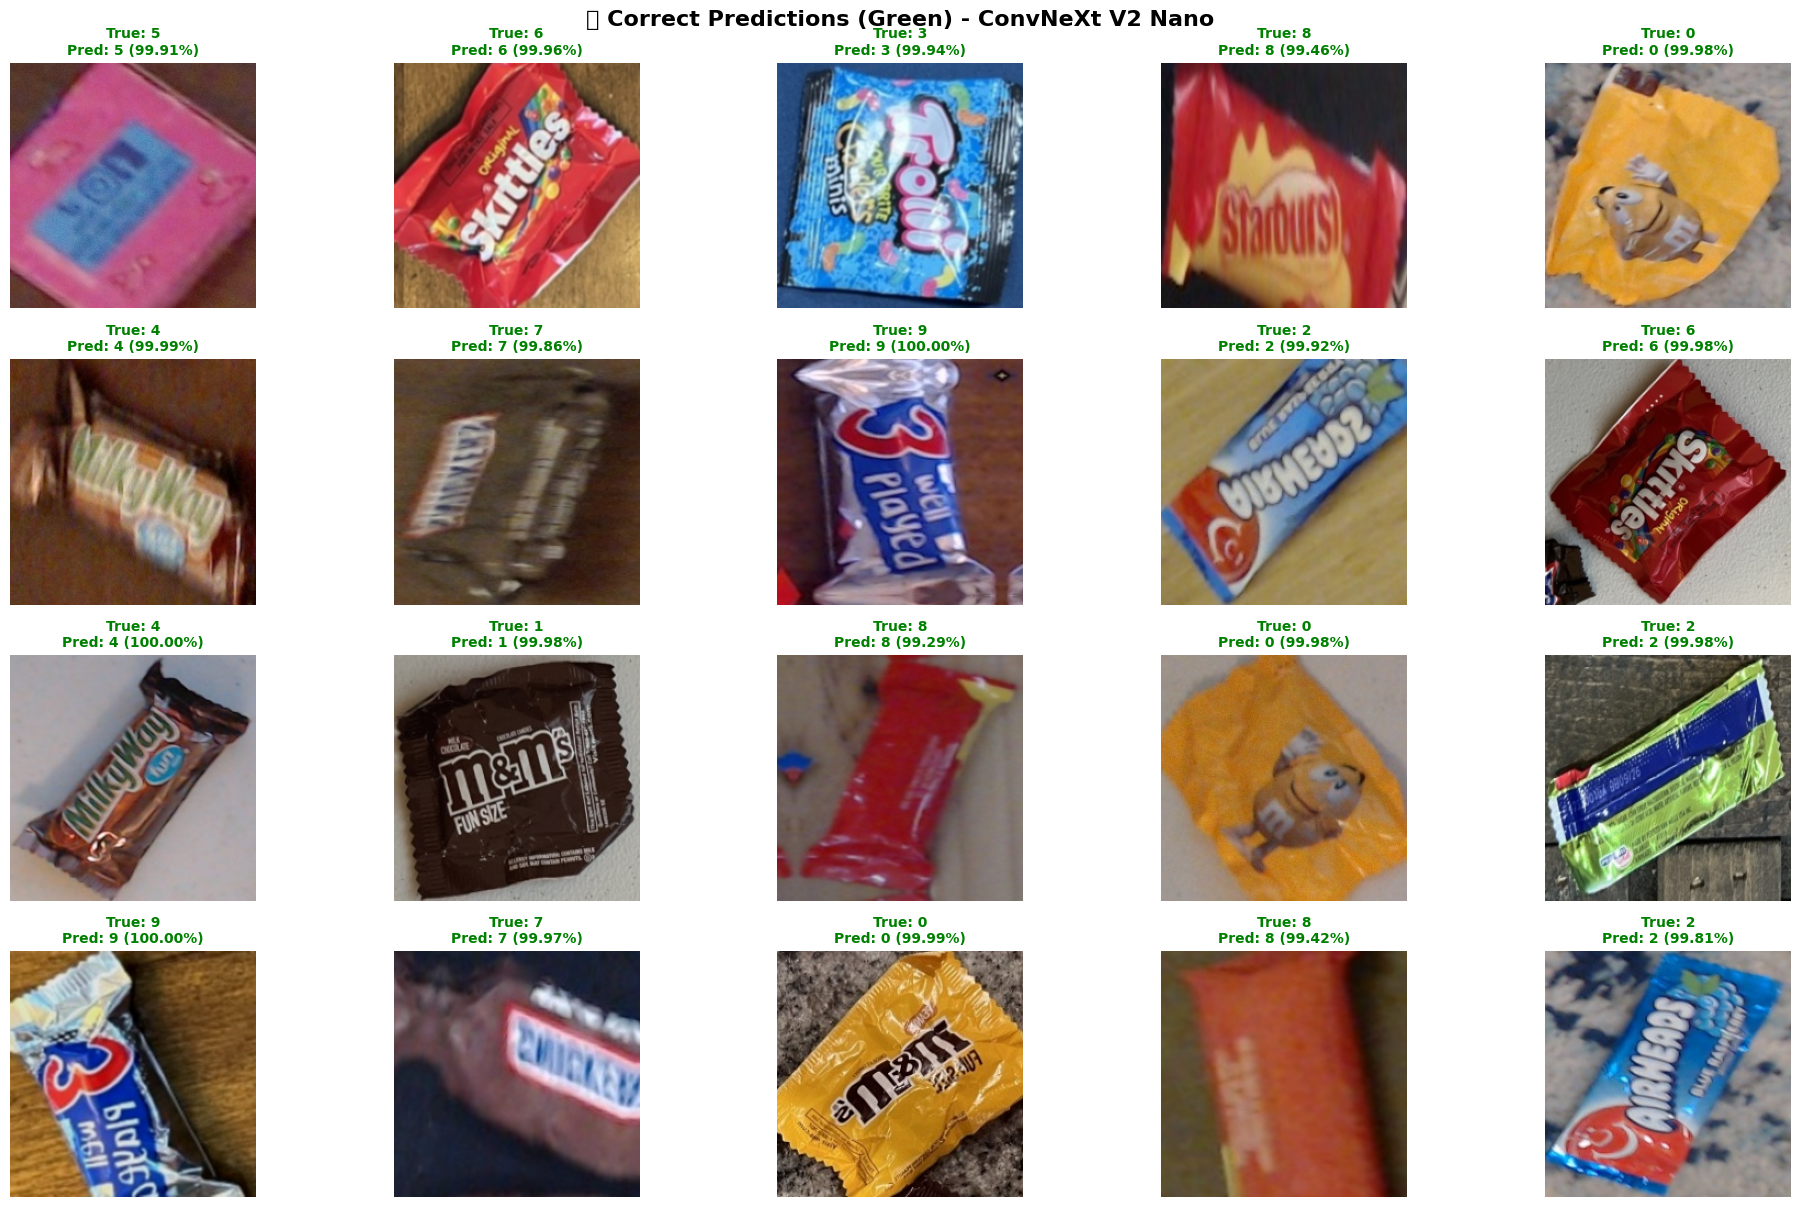

In [ ]:
# ============================================================================
# STEP 12: VISUALIZE PREDICTIONS
# ============================================================================
print("\n" + "=" * 70)
print("STEP 12: VISUALIZING SAMPLE PREDICTIONS")
print("=" * 70)

def denormalize(tensor):
    """Denormalize image tensor for visualization"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor

def plot_predictions_pytorch(dataset, indices, predictions, true_labels, title="Predictions"):
    """Plot specific images by their indices with true and predicted labels"""
    plt.figure(figsize=(20, 12))

    for plot_idx, sample_idx in enumerate(indices[:20]):
        img, label = dataset[sample_idx]
        img = denormalize(img)
        img = img.permute(1, 2, 0).numpy()

        true_label = true_labels[sample_idx]
        pred_label = predictions[sample_idx]
        pred_prob = y_pred_probs[sample_idx, pred_label]

        plt.subplot(4, 5, plot_idx + 1)
        plt.imshow(img)

        color = 'green' if pred_label == true_label else 'red'
        title_text = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]} ({pred_prob:.2%})"

        plt.title(title_text, color=color, fontsize=10, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, fontweight='bold', y=1.002)
    plt.show()

print("\n✅ Sample CORRECT Predictions:")
correct_indices = np.where(y_pred == y_true)[0]
print(f"   Found {len(correct_indices)} correct predictions ({len(correct_indices)/len(y_true)*100:.1f}%)")

print("\n❌ Sample INCORRECT Predictions:")
incorrect_indices = np.where(y_pred != y_true)[0]
print(f"   Found {len(incorrect_indices)} incorrect predictions ({len(incorrect_indices)/len(y_true)*100:.1f}%)")

if len(correct_indices) > 0:
    random_correct = np.random.choice(correct_indices, min(20, len(correct_indices)), replace=False)
    plot_predictions_pytorch(test_dataset, random_correct, y_pred, y_true,
                            title='✅ Correct Predictions (Green) - ConvNeXt V2 Nano')

if len(incorrect_indices) > 0:
    random_incorrect = np.random.choice(incorrect_indices, min(20, len(incorrect_indices)), replace=False)
    plot_predictions_pytorch(test_dataset, random_incorrect, y_pred, y_true,
                            title='❌ Incorrect Predictions (Red) - ConvNeXt V2 Nano')


In [ ]:
!zip -r /content/saved_model_ConvNeXt-Nano.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/predictions.csv (deflated 96%)
  adding: content/saved_model/best_convnext_v2_nano.pth (deflated 7%)
  adding: content/saved_model/classification_report.csv (deflated 66%)
  adding: content/saved_model/confusion_matrix.csv (deflated 73%)
  adding: content/saved_model/convnext_v2_nano_final.pth (deflated 7%)
  adding: content/saved_model/training_history.pkl (deflated 9%)


In [ ]:
!ls -alh /content/

total 257M
drwxr-xr-x 1 root root 4.0K Oct 14 23:03 .
drwxr-xr-x 1 root root 4.0K Oct 14 22:45 ..
drwxr-xr-x 5 root root 4.0K Oct 14 22:51 candy_split
drwxr-xr-x 4 root root 4.0K Oct 13 13:43 .config
drwxr-xr-x 3 root root 4.0K Oct 14 22:51 content
-rw-r--r-- 1 root root  44M Oct 12 19:11 cropped_aug_final.zip
drwxr-xr-x 2 root root 4.0K Oct 14 23:03 .ipynb_checkpoints
drwxr-xr-x 1 root root 4.0K Oct 13 13:43 sample_data
drwxr-xr-x 2 root root 4.0K Oct 14 23:00 saved_model
-rw-r--r-- 1 root root 213M Oct 14 23:03 saved_model_ConvNeXt-Nano.zip


In [ ]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("✨ EVALUATION COMPLETE!")
print("=" * 70)
print(f"📁 All files saved to: {base_dir}")
print(f"\n🔹 Model: ConvNeXt V2 Nano (~15.6M parameters)")
print(f"🔹 Framework: PyTorch + timm")
print(f"🔹 Best Validation Accuracy: {best_val_acc*100:.2f}%")
print(f"🔹 Test Accuracy: {(y_pred == y_true).sum() / len(y_true) * 100:.2f}%")
print("\nSaved files:")
print("  • convnext_v2_nano_final.pth")
print("  • best_convnext_v2_nano.pth")
print("  • training_history.pkl")
print("  • confusion_matrix.csv")
print("  • classification_report.csv")
print("  • predictions.csv")
print("=" * 70)


✨ EVALUATION COMPLETE!
📁 All files saved to: /content/saved_model

🔹 Model: ConvNeXt V2 Nano (~15.6M parameters)
🔹 Framework: PyTorch + timm
🔹 Best Validation Accuracy: 99.55%
🔹 Test Accuracy: 100.00%

Saved files:
  • convnext_v2_nano_final.pth
  • best_convnext_v2_nano.pth
  • training_history.pkl
  • confusion_matrix.csv
  • classification_report.csv
  • predictions.csv


### MSCViT

In [ ]:
# ============================================================================
# MSCViT (Multi-Scale Vision Transformer) Candy Classifier
# Model: Multi-Scale ConvViT | Framework: PyTorch + timm
# ============================================================================

import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Using device: {device}")

🔧 Using device: cuda


In [ ]:
# ============================================================================
# STEP 1: DATASET SPLITTING
# ============================================================================
print("\n" + "=" * 70)
print("STEP 1: SPLITTING DATASET INTO TRAIN/VAL/TEST")
print("=" * 70)

BASE = "/content/content/cropped_aug_final"
OUT = "/content/candy_split"
SPLITS = {"train": 0.70, "val": 0.20, "test": 0.10}

# Create directory structure
for split in SPLITS.keys():
    for cls in os.listdir(BASE):
        os.makedirs(os.path.join(OUT, split, cls), exist_ok=True)

# Split files into train/val/test
for cls in tqdm(os.listdir(BASE), desc="Splitting dataset"):
    cls_path = os.path.join(BASE, cls)
    files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(files)

    n_total = len(files)
    n_train = int(SPLITS["train"] * n_total)
    n_val = int(SPLITS["val"] * n_total)

    subsets = {
        "train": files[:n_train],
        "val": files[n_train:n_train + n_val],
        "test": files[n_train + n_val:]
    }

    for split, fs in subsets.items():
        for f in fs:
            shutil.copy(os.path.join(cls_path, f), os.path.join(OUT, split, cls, f))

print("✅ Dataset split complete!\n")


STEP 1: SPLITTING DATASET INTO TRAIN/VAL/TEST


Splitting dataset: 100%|██████████| 11/11 [00:00<00:00, 51.81it/s]

✅ Dataset split complete!



In [ ]:
# ============================================================================
# STEP 2: DATA LOADING & PREPROCESSING
# ============================================================================
print("=" * 70)
print("STEP 2: LOADING DATASETS WITH PYTORCH")
print("=" * 70)

IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation and preprocessing for ViT models
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(f"{OUT}/train", transform=train_transform)
val_dataset = datasets.ImageFolder(f"{OUT}/val", transform=val_test_transform)
test_dataset = datasets.ImageFolder(f"{OUT}/test", transform=val_test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

class_names = train_dataset.classes
num_classes = len(class_names)
print(f"\n📊 Dataset Statistics:")
print(f"   • Number of classes: {num_classes}")
print(f"   • Classes: {class_names}")
print(f"   • Train samples: {len(train_dataset)}")
print(f"   • Val samples: {len(val_dataset)}")
print(f"   • Test samples: {len(test_dataset)}")
print()

STEP 2: LOADING DATASETS WITH PYTORCH

📊 Dataset Statistics:
   • Number of classes: 11
   • Classes: ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
   • Train samples: 1540
   • Val samples: 440
   • Test samples: 220



In [ ]:
# ============================================================================
# STEP 3: BUILD MODEL WITH MSCVIT
# ============================================================================
print("=" * 70)
print("STEP 3: BUILDING MSCVIT MODEL")
print("=" * 70)

# Available MSCViT variants in timm:
# - convit_tiny: ~5.7M params
# - convit_small: ~27.8M params
# - convit_base: ~86.5M params

MODEL_CHOICE = "tiny"  # Options: "tiny", "small", "base"

print(f"\n🔹 Loading MSCViT (ConViT) - {MODEL_CHOICE.capitalize()} variant")

if MODEL_CHOICE == "tiny":
    model_name = 'convit_tiny'
    print("   • ConViT-Tiny: ~5.7M parameters - Lightest, fastest")
elif MODEL_CHOICE == "small":
    model_name = 'convit_small'
    print("   • ConViT-Small: ~27.8M parameters - Balanced")
elif MODEL_CHOICE == "base":
    model_name = 'convit_base'
    print("   • ConViT-Base: ~86.5M parameters - Most powerful")
else:
    raise ValueError("MODEL_CHOICE must be 'tiny', 'small', or 'base'")

# Load ConViT model with pretrained weights
model = timm.create_model(
    model_name,
    pretrained=True,
    num_classes=num_classes
)

# Move model to device
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📋 Model Architecture:")
print(f"   • Model: ConViT (MSCViT) - {MODEL_CHOICE.capitalize()}")
print(f"   • Total parameters: {total_params:,}")
print(f"   • Trainable parameters: {trainable_params:,}")
print(f"   • Input size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   • Number of classes: {num_classes}")
print(f"   • Architecture: Hybrid CNN + Vision Transformer")
print()

STEP 3: BUILDING MSCVIT MODEL

🔹 Loading MSCViT (ConViT) - Tiny variant
   • ConViT-Tiny: ~5.7M parameters - Lightest, fastest


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]


📋 Model Architecture:
   • Model: ConViT (MSCViT) - Tiny
   • Total parameters: 5,519,635
   • Trainable parameters: 5,519,635
   • Input size: 224x224
   • Number of classes: 11
   • Architecture: Hybrid CNN + Vision Transformer



In [ ]:
# ============================================================================
# STEP 4: TRAINING SETUP
# ============================================================================
print("=" * 70)
print("STEP 4: TRAINING SETUP")
print("=" * 70)

NUM_EPOCHS = 10
LEARNING_RATE = 1e-3

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.05)

# Learning rate scheduler with warmup (important for ViT models)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6)

print(f"\n⚙️ Training Configuration:")
print(f"   • Epochs: {NUM_EPOCHS}")
print(f"   • Learning rate: {LEARNING_RATE}")
print(f"   • Optimizer: AdamW (weight_decay=0.05)")
print(f"   • Loss function: CrossEntropyLoss")
print(f"   • LR Scheduler: CosineAnnealing")
print(f"   • Batch size: {BATCH_SIZE}")
print()

STEP 4: TRAINING SETUP

⚙️ Training Configuration:
   • Epochs: 10
   • Learning rate: 0.001
   • Optimizer: AdamW (weight_decay=0.05)
   • Loss function: CrossEntropyLoss
   • LR Scheduler: CosineAnnealing
   • Batch size: 32



In [ ]:
# ============================================================================
# STEP 5: TRAINING LOOP
# ============================================================================
print("=" * 70)
print("STEP 5: TRAINING MODEL")
print("=" * 70)

history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

best_val_acc = 0.0
best_model_path = '/content/saved_model/best_mscvit_model.pth'
os.makedirs('/content/saved_model', exist_ok=True)

# Early stopping configuration
EARLY_STOP_THRESHOLD = 0.99  # 99% accuracy threshold
early_stopped = False

print("\n🚀 Starting training...")
print(f"⚠️  Early stopping enabled: Will stop if both train & val accuracy reach {EARLY_STOP_THRESHOLD*100:.0f}%\n")

for epoch in range(NUM_EPOCHS):
    # ========== TRAINING PHASE ==========
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Update progress bar
        train_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100 * train_correct / train_total:.2f}%'
        })

    epoch_train_loss = train_loss / train_total
    epoch_train_acc = train_correct / train_total

    # ========== VALIDATION PHASE ==========
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]  ")
        for images, labels in val_bar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            val_bar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100 * val_correct / val_total:.2f}%'
            })

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total

    # Save history
    history['train_loss'].append(epoch_train_loss)
    history['train_acc'].append(epoch_train_acc)
    history['val_loss'].append(epoch_val_loss)
    history['val_acc'].append(epoch_val_acc)

    # Print epoch summary
    current_lr = optimizer.param_groups[0]['lr']
    print(f"\n📊 Epoch {epoch+1}/{NUM_EPOCHS} Summary:")
    print(f"   Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc*100:.2f}%")
    print(f"   Val Loss:   {epoch_val_loss:.4f} | Val Acc:   {epoch_val_acc*100:.2f}%")
    print(f"   Learning Rate: {current_lr:.6f}")

    # Learning rate scheduling
    scheduler.step()

    # Save best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': epoch_val_acc,
            'class_names': class_names,
            'model_name': model_name
        }, best_model_path)
        print(f"   ✓ Best model saved! (Val Acc: {best_val_acc*100:.2f}%)")

    # Early stopping check
    if epoch_train_acc >= EARLY_STOP_THRESHOLD and epoch_val_acc >= EARLY_STOP_THRESHOLD:
        print(f"\n🎉 Early stopping triggered!")
        print(f"   Both train and validation accuracy reached {EARLY_STOP_THRESHOLD*100:.0f}%")
        print(f"   Train Acc: {epoch_train_acc*100:.2f}% | Val Acc: {epoch_val_acc*100:.2f}%")
        print(f"   Stopping training at epoch {epoch+1}/{NUM_EPOCHS}")
        early_stopped = True
        break

    print()

if early_stopped:
    print(f"✅ Training stopped early at epoch {epoch+1}/{NUM_EPOCHS}")
    print(f"   Achieved target accuracy on both train and validation sets!\n")
else:
    print("✅ Training complete!\n")

STEP 5: TRAINING MODEL

🚀 Starting training...
⚠️  Early stopping enabled: Will stop if both train & val accuracy reach 99%



Epoch 1/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 11.04it/s, loss=2.4467, acc=44.09%]



📊 Epoch 1/10 Summary:
   Train Loss: 1.8262 | Train Acc: 33.05%
   Val Loss:   1.5056 | Val Acc:   44.09%
   Learning Rate: 0.001000
   ✓ Best model saved! (Val Acc: 44.09%)



Epoch 2/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 10.92it/s, loss=0.7572, acc=58.64%]



📊 Epoch 2/10 Summary:
   Train Loss: 1.2471 | Train Acc: 53.90%
   Val Loss:   1.1036 | Val Acc:   58.64%
   Learning Rate: 0.000976
   ✓ Best model saved! (Val Acc: 58.64%)



Epoch 3/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 10.94it/s, loss=0.1681, acc=74.32%]



📊 Epoch 3/10 Summary:
   Train Loss: 0.8193 | Train Acc: 70.58%
   Val Loss:   0.7427 | Val Acc:   74.32%
   Learning Rate: 0.000905
   ✓ Best model saved! (Val Acc: 74.32%)



Epoch 4/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 10.78it/s, loss=0.1515, acc=83.18%]



📊 Epoch 4/10 Summary:
   Train Loss: 0.5865 | Train Acc: 79.74%
   Val Loss:   0.4986 | Val Acc:   83.18%
   Learning Rate: 0.000794
   ✓ Best model saved! (Val Acc: 83.18%)



Epoch 5/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 10.83it/s, loss=1.0906, acc=84.77%]



📊 Epoch 5/10 Summary:
   Train Loss: 0.3923 | Train Acc: 86.88%
   Val Loss:   0.3772 | Val Acc:   84.77%
   Learning Rate: 0.000655
   ✓ Best model saved! (Val Acc: 84.77%)



Epoch 6/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00, 10.96it/s, loss=0.1985, acc=91.36%]



📊 Epoch 6/10 Summary:
   Train Loss: 0.2048 | Train Acc: 93.18%
   Val Loss:   0.2566 | Val Acc:   91.36%
   Learning Rate: 0.000501
   ✓ Best model saved! (Val Acc: 91.36%)



Epoch 7/10 [Val]  : 100%|██████████| 14/14 [00:02<00:00,  6.45it/s, loss=0.1155, acc=97.73%]



📊 Epoch 7/10 Summary:
   Train Loss: 0.1200 | Train Acc: 96.69%
   Val Loss:   0.0869 | Val Acc:   97.73%
   Learning Rate: 0.000346
   ✓ Best model saved! (Val Acc: 97.73%)



Epoch 8/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  7.88it/s, loss=0.0138, acc=96.59%]



📊 Epoch 8/10 Summary:
   Train Loss: 0.0595 | Train Acc: 98.51%
   Val Loss:   0.1155 | Val Acc:   96.59%
   Learning Rate: 0.000207



Epoch 9/10 [Val]  : 100%|██████████| 14/14 [00:01<00:00,  8.08it/s, loss=0.0131, acc=98.64%]



📊 Epoch 9/10 Summary:
   Train Loss: 0.0423 | Train Acc: 98.90%
   Val Loss:   0.0562 | Val Acc:   98.64%
   Learning Rate: 0.000096
   ✓ Best model saved! (Val Acc: 98.64%)



Epoch 10/10 [Val]  : 100%|██████████| 14/14 [00:03<00:00,  4.63it/s, loss=0.0165, acc=98.41%]


📊 Epoch 10/10 Summary:
   Train Loss: 0.0322 | Train Acc: 99.22%
   Val Loss:   0.0554 | Val Acc:   98.41%
   Learning Rate: 0.000025

✅ Training complete!



In [ ]:
# ============================================================================
# STEP 6: SAVE MODEL AND HISTORY
# ============================================================================
print("=" * 70)
print("STEP 6: SAVING MODEL")
print("=" * 70)

base_dir = '/content/saved_model'

# Save final model
final_model_path = os.path.join(base_dir, f'mscvit_{MODEL_CHOICE}_final.pth')
torch.save({
    'model_state_dict': model.state_dict(),
    'class_names': class_names,
    'num_classes': num_classes,
    'model_name': model_name
}, final_model_path)
print(f"   ✓ Final model saved as 'mscvit_{MODEL_CHOICE}_final.pth'")

# Save training history
with open(os.path.join(base_dir, 'training_history.pkl'), 'wb') as f:
    pickle.dump(history, f)
print(f"   ✓ Training history saved as 'training_history.pkl'")

print("\n📦 All files saved successfully!\n")


STEP 6: SAVING MODEL
   ✓ Final model saved as 'mscvit_tiny_final.pth'
   ✓ Training history saved as 'training_history.pkl'

📦 All files saved successfully!



In [ ]:
# ============================================================================
# STEP 7: LOAD BEST MODEL AND GENERATE PREDICTIONS
# ============================================================================
print("=" * 70)
print("STEP 7: LOADING BEST MODEL AND GENERATING PREDICTIONS")
print("=" * 70)

# Load best model
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])
print(f"✓ Loaded best model (Val Acc: {checkpoint['val_acc']*100:.2f}%)")

# Generate predictions on test set
model.eval()
y_true = []
y_pred = []
y_pred_probs = []

print("\nGenerating predictions on test set...")
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Predicting"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_probs.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)

print(f"✓ Predicted {len(y_pred)} samples\n")

STEP 7: LOADING BEST MODEL AND GENERATING PREDICTIONS
✓ Loaded best model (Val Acc: 98.64%)

Generating predictions on test set...


Predicting: 100%|██████████| 7/7 [00:01<00:00,  6.54it/s]

✓ Predicted 220 samples



STEP 8: CONFUSION MATRIX


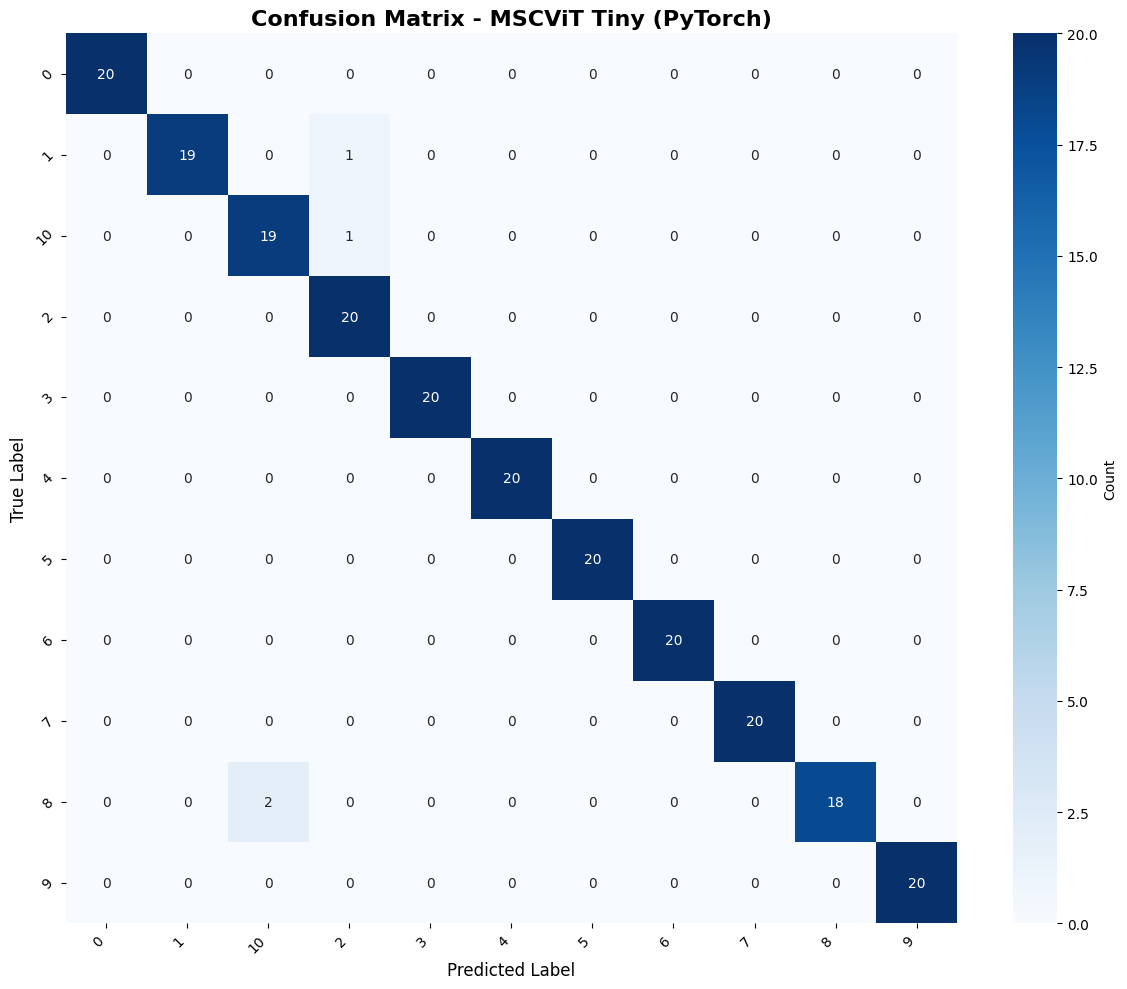

In [ ]:
# ============================================================================
# STEP 8: CONFUSION MATRIX
# ============================================================================
print("=" * 70)
print("STEP 8: CONFUSION MATRIX")
print("=" * 70)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={'label': 'Count'}
)
plt.title(f'Confusion Matrix - MSCViT {MODEL_CHOICE.capitalize()} (PyTorch)', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='center')
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# STEP 9: CLASSIFICATION REPORT
# ============================================================================
print("\n" + "=" * 70)
print("STEP 9: DETAILED EVALUATION METRICS")
print("=" * 70)

print("\n📋 Classification Report:")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

print("\n📊 Per-Class Accuracy:")
print("=" * 60)
for i, class_name in enumerate(class_names):
    class_mask = y_true == i
    if class_mask.sum() > 0:
        class_acc = (y_pred[class_mask] == i).sum() / class_mask.sum()
        print(f"Class {class_name:>20}: {class_acc:.3f} ({class_mask.sum():>4} samples)")

print("\n🔀 Most Confused Class Pairs:")
print("=" * 60)
confused_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            confused_pairs.append((class_names[i], class_names[j], cm[i, j]))

confused_pairs.sort(key=lambda x: x[2], reverse=True)
for true_class, pred_class, count in confused_pairs[:10]:
    print(f"True: {true_class:>20} → Predicted as: {pred_class:>20} ({count} times)")


STEP 9: DETAILED EVALUATION METRICS

📋 Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        20
           1      1.000     0.950     0.974        20
          10      0.905     0.950     0.927        20
           2      0.909     1.000     0.952        20
           3      1.000     1.000     1.000        20
           4      1.000     1.000     1.000        20
           5      1.000     1.000     1.000        20
           6      1.000     1.000     1.000        20
           7      1.000     1.000     1.000        20
           8      1.000     0.900     0.947        20
           9      1.000     1.000     1.000        20

    accuracy                          0.982       220
   macro avg      0.983     0.982     0.982       220
weighted avg      0.983     0.982     0.982       220


📊 Per-Class Accuracy:
Class                    0: 1.000 (  20 samples)
Class                    1: 0.950 (  20 samples)
Cla


STEP 10: TRAINING HISTORY VISUALIZATION


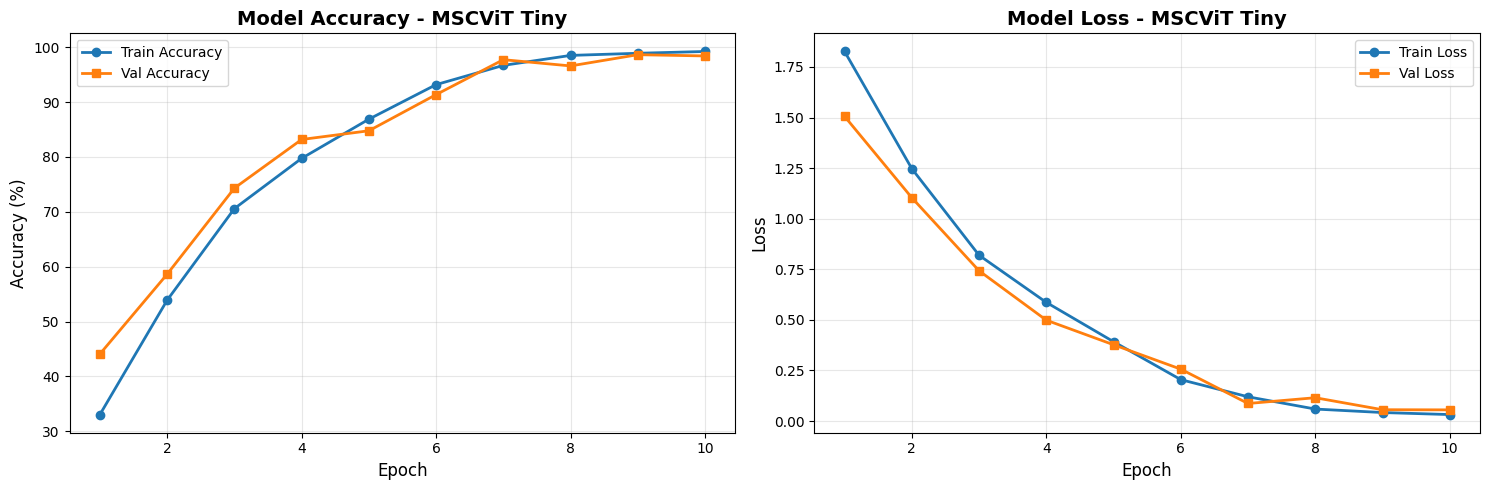

In [ ]:
# ============================================================================
# STEP 10: PLOT TRAINING HISTORY
# ============================================================================
print("\n" + "=" * 70)
print("STEP 10: TRAINING HISTORY VISUALIZATION")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
epochs_range = range(1, len(history['train_acc']) + 1)
axes[0].plot(epochs_range, [acc*100 for acc in history['train_acc']],
             label='Train Accuracy', marker='o', linewidth=2)
axes[0].plot(epochs_range, [acc*100 for acc in history['val_acc']],
             label='Val Accuracy', marker='s', linewidth=2)
axes[0].set_title(f'Model Accuracy - MSCViT {MODEL_CHOICE.capitalize()}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(epochs_range, history['train_loss'],
             label='Train Loss', marker='o', linewidth=2)
axes[1].plot(epochs_range, history['val_loss'],
             label='Val Loss', marker='s', linewidth=2)
axes[1].set_title(f'Model Loss - MSCViT {MODEL_CHOICE.capitalize()}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# STEP 11: SAVE EVALUATION RESULTS
# ============================================================================
print("\n" + "=" * 70)
print("STEP 11: SAVING EVALUATION RESULTS")
print("=" * 70)

# Save confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv(os.path.join(base_dir, 'confusion_matrix.csv'))
print("   ✓ Confusion matrix saved to 'confusion_matrix.csv'")

# Save classification report
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(base_dir, 'classification_report.csv'))
print("   ✓ Classification report saved to 'classification_report.csv'")

# Save predictions
predictions_df = pd.DataFrame({
    'true_label': [class_names[i] for i in y_true],
    'predicted_label': [class_names[i] for i in y_pred],
    'correct': y_true == y_pred
})
predictions_df.to_csv(os.path.join(base_dir, 'predictions.csv'), index=False)
print("   ✓ Predictions saved to 'predictions.csv'")


STEP 11: SAVING EVALUATION RESULTS
   ✓ Confusion matrix saved to 'confusion_matrix.csv'
   ✓ Classification report saved to 'classification_report.csv'
   ✓ Predictions saved to 'predictions.csv'


In [ ]:
# ============================================================================
# STEP 12: VISUALIZE PREDICTIONS
# ============================================================================
print("\n" + "=" * 70)
print("STEP 12: VISUALIZING SAMPLE PREDICTIONS")
print("=" * 70)

def denormalize(tensor):
    """Denormalize image tensor for visualization"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor

def plot_predictions_pytorch(dataset, indices, predictions, true_labels, title="Predictions"):
    """Plot specific images by their indices with true and predicted labels"""
    plt.figure(figsize=(20, 12))

    for plot_idx, sample_idx in enumerate(indices[:20]):
        img, label = dataset[sample_idx]
        img = denormalize(img)
        img = img.permute(1, 2, 0).numpy()

        true_label = true_labels[sample_idx]
        pred_label = predictions[sample_idx]
        pred_prob = y_pred_probs[sample_idx, pred_label]

        plt.subplot(4, 5, plot_idx + 1)
        plt.imshow(img)

        color = 'green' if pred_label == true_label else 'red'
        title_text = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]} ({pred_prob:.2%})"

        plt.title(title_text, color=color, fontsize=10, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, fontweight='bold', y=1.002)
    plt.show()

print("\n✅ Sample CORRECT Predictions:")
correct_indices = np.where(y_pred == y_true)[0]
print(f"   Found {len(correct_indices)} correct predictions ({len(correct_indices)/len(y_true)*100:.1f}%)")

print("\n❌ Sample INCORRECT Predictions:")
incorrect_indices = np.where(y_pred != y_true)[0]
print(f"   Found {len(incorrect_indices)} incorrect predictions ({len(incorrect_indices)/len(y_true)*100:.1f}%)")

if len(correct_indices) > 0:
    random_correct = np.random.choice(correct_indices, min(20, len(correct_indices)), replace=False)
    plot_predictions_pytorch(test_dataset, random_correct, y_pred, y_true,
                            title=f'✅ Correct Predictions (Green) - MSCViT {MODEL_CHOICE.capitalize()}')

if len(incorrect_indices) > 0:
    random_incorrect = np.random.choice(incorrect_indices, min(20, len(incorrect_indices)), replace=False)
    plot_predictions_pytorch(test_dataset, random_incorrect, y_pred, y_true,
                            title=f'❌ Incorrect Predictions (Red) - MSCViT {MODEL_CHOICE.capitalize()}')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("✨ EVALUATION COMPLETE!")
print("=" * 70)
print(f"📁 All files saved to: {base_dir}")
print(f"\n🔹 Model: MSCViT (ConViT) - {MODEL_CHOICE.capitalize()}")
print(f"🔹 Architecture: Hybrid CNN + Vision Transformer")
print(f"🔹 Parameters: {total_params:,}")
print(f"🔹 Framework: PyTorch + timm")
print(f"🔹 Best Validation Accuracy: {best_val_acc*100:.2f}%")
print(f"🔹 Test Accuracy: {(y_pred == y_true).sum() / len(y_true) * 100:.2f}%")
print("\nSaved files:")
print(f"  • mscvit_{MODEL_CHOICE}_final.pth")
print("  • best_mscvit_model.pth")
print("  • training_history.pkl")
print("  • confusion_matrix.csv")
print("  • classification_report.csv")
print("  • predictions.csv")
print("=" * 70)


✨ EVALUATION COMPLETE!
📁 All files saved to: /content/saved_model

🔹 Model: MSCViT (ConViT) - Tiny
🔹 Architecture: Hybrid CNN + Vision Transformer
🔹 Parameters: 5,519,635
🔹 Framework: PyTorch + timm
🔹 Best Validation Accuracy: 98.64%
🔹 Test Accuracy: 98.18%

Saved files:
  • mscvit_tiny_final.pth
  • best_mscvit_model.pth
  • training_history.pkl
  • confusion_matrix.csv
  • classification_report.csv
  • predictions.csv


In [ ]:
!zip -r /content/saved_model_MSCViT.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/confusion_matrix.csv (deflated 71%)
  adding: content/saved_model/training_history.pkl (deflated 10%)
  adding: content/saved_model/predictions.csv (deflated 94%)
  adding: content/saved_model/classification_report.csv (deflated 66%)
  adding: content/saved_model/mscvit_tiny_final.pth (deflated 7%)
  adding: content/saved_model/best_mscvit_model.pth (deflated 8%)


In [ ]:
!ls -alh /content/

total 122M
drwxr-xr-x 1 root root 4.0K Oct 16 14:37 .
drwxr-xr-x 1 root root 4.0K Oct 16 14:20 ..
drwxr-xr-x 5 root root 4.0K Oct 16 14:25 candy_split
drwxr-xr-x 4 root root 4.0K Oct 14 13:41 .config
drwxr-xr-x 3 root root 4.0K Oct 16 14:25 content
-rw-r--r-- 1 root root  44M Oct 12 19:11 cropped_aug_final.zip
drwxr-xr-x 1 root root 4.0K Oct 14 13:41 sample_data
drwxr-xr-x 2 root root 4.0K Oct 16 14:33 saved_model
-rw-r--r-- 1 root root  78M Oct 16 14:37 saved_model_MSCViT.zip
